In [32]:
import sys

sys.path.append('..')

from lightning_module import PreTrainLightning
from models import TSMVAE

from dataset import create_dataloaders
from inference_utils import load_pretrained_model
import torch
import matplotlib.pyplot as plt
import numpy as np

In [43]:
model = load_pretrained_model(
    model_class=TSMVAE,
    lightning_class=PreTrainLightning,
    checkpoint_substr="TSMVAE",
    folder_name='/home/jp4474/viaABC/CAR_d64_ed32_6_4_4_4_vae_mask_0.15_beta_0.001_noise_0.1',)

Successfully loaded model


In [44]:
train_loader, val_loader = create_dataloaders(
    batch_size=16,
    data_dir='../data/BCELL')

In [45]:
with torch.no_grad():
    for batch in val_loader:
        recon = model(batch.to(model.device), mask_ratio=0)[-1]
        break

In [46]:
recon.shape

torch.Size([16, 8, 2])

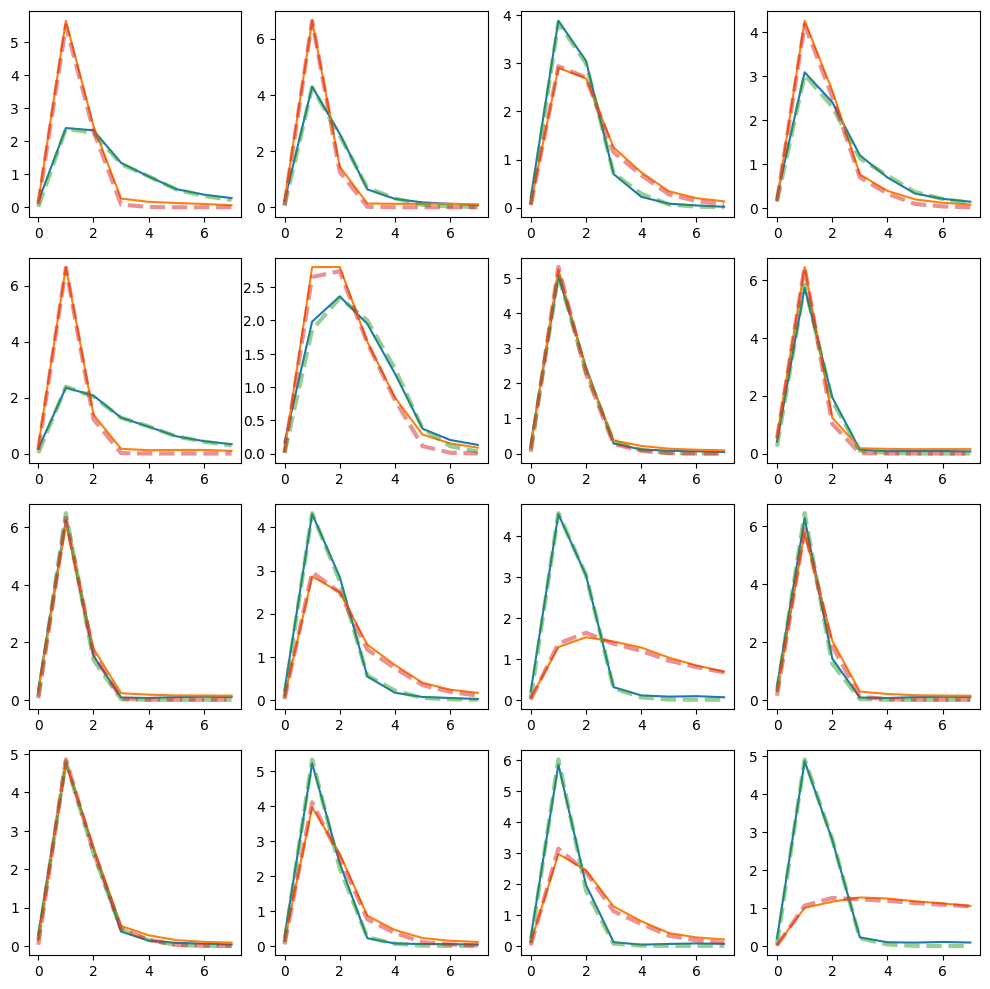

In [47]:
# plot 4 by 4 grid of reconstructions
def plot_reconstructions(reconstructions, n=4):
    fig, axes = plt.subplots(n, n, figsize=(10, 10))
    for i in range(n):
        for j in range(n):
            idx = i * n + j
            if idx < len(reconstructions):
                ax = axes[i, j]
                ax.plot(reconstructions[idx].cpu().numpy())
                ax.plot(batch[idx].cpu().numpy(), alpha=0.5, label='Original', linewidth=3, linestyle='--')
                #ax.axis('off')
    plt.tight_layout()
    plt.show()
plot_reconstructions(recon[:16], n=4)

In [48]:
observational_data = np.load('../data/BCELL/noisy_data.npy')
s = np.mean(observational_data, axis=0)
scaled_observational_data = observational_data/s
with torch.no_grad():
    pred = model(torch.from_numpy(scaled_observational_data).float().unsqueeze(0).to(model.device), mask_ratio = 0.0)[-1].squeeze(0).cpu().numpy()

In [49]:
s

array([484252.05488765, 102633.43501333])

In [50]:
time_space = np.array([4, 7, 9, 14, 17, 22, 26, 30])

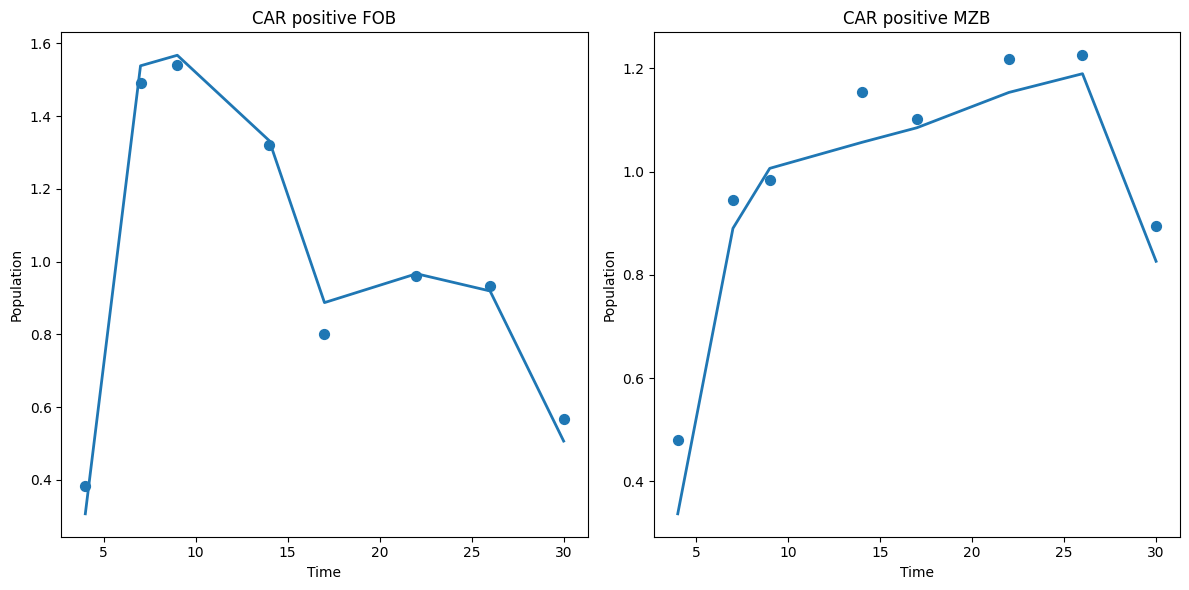

In [51]:
# plot pred as lines, observational_data as points
plt.figure(figsize=(12, 6))

# Plot both species (variables) separately
plt.subplot(1, 2, 1)
plt.plot(time_space, pred[:, 0], label='Reconstruction', linewidth=2)
plt.scatter(time_space, scaled_observational_data[:, 0], label='Observational Data', s=50)
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('CAR positive FOB')

plt.subplot(1, 2, 2)
plt.plot(time_space, pred[:, 1], label='Reconstruction', linewidth=2)
plt.scatter(time_space, scaled_observational_data[:, 1], label='Observational Data', s=50)
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('CAR positive MZB')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'CAR positive MZB')

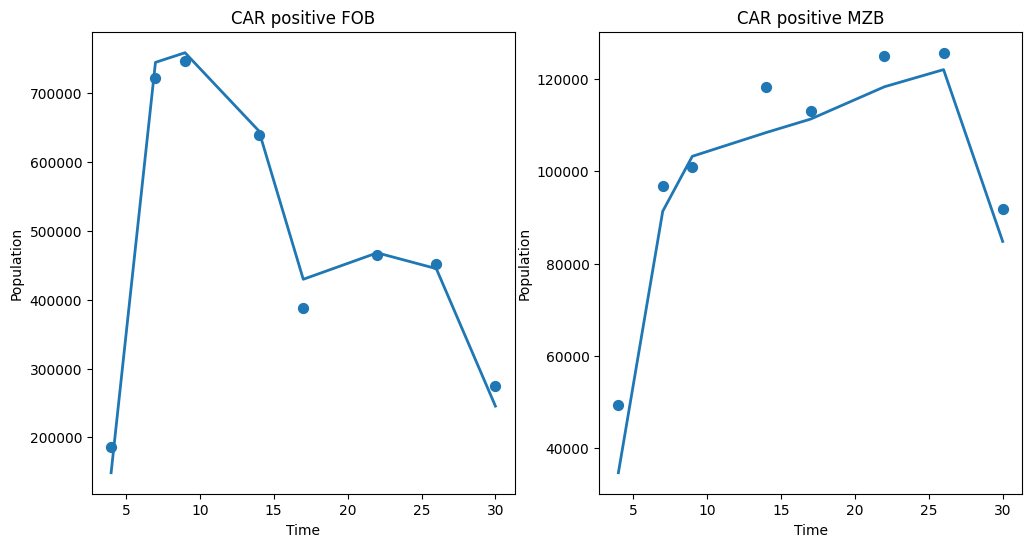

In [52]:
# plot in original scale
plt.figure(figsize=(12, 6))

# Plot both species (variables) separately
plt.subplot(1, 2, 1)
plt.plot(time_space, pred[:, 0] * s[0], label='Reconstruction', linewidth=2)
plt.scatter(time_space, observational_data[:, 0], label='Observational Data', s=50)
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('CAR positive FOB')

plt.subplot(1, 2, 2)
plt.plot(time_space, pred[:, 1] * s[1], label='Reconstruction', linewidth=2)
plt.scatter(time_space, observational_data[:, 1], label='Observational Data', s=50)
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('CAR positive MZB')